## Assignment 1
SPPH 500 /
Ly Trinh

### Question 1

In this question, we will work with some data from a Florida Study investigating the relationship between mental health and various explanatory variables.  We will work with a sub-sample of 40 subjects.  

The outcome of interest, MentalImp, is a numeric index of mental health impairment that incorporates various measures of anxiety and depression.  We will work with two of the explanatory variables: a LifeEvents numeric score that combines the number and severity of various stressful life events, and a numeric index of socio-economic status (SES).  

The data is saved in the file MentalHealth.csv.  We would like to estimate the effect of Life Events and SES on mental health impairment. 
 
Make sure to provide justification for all answers. 

In [1]:
# library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1     v purrr   0.3.2
v tibble  3.1.1     v dplyr   1.0.6
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [20]:
MH_data <- read.csv("./MentalHealth.csv")

#### (a) Initial variable examination
Examine univariate and bivariate descriptive statistics for the variables in this data set.  You do NOT need to include this in your submitted assignment, but you should work through examining the data before working with it.

In [21]:
#show the first lines
head(MH_data)

MentalImp,LifeEvents,SES
17,46,84
19,39,97
20,27,24
20,3,85
20,10,15
21,44,55


In [22]:
# numerical summaries
summary(MH_data)

   MentalImp       LifeEvents         SES       
 Min.   :17.00   Min.   : 3.00   Min.   : 3.00  
 1st Qu.:23.75   1st Qu.:32.75   1st Qu.:39.75  
 Median :27.00   Median :43.00   Median :56.00  
 Mean   :27.30   Mean   :44.42   Mean   :56.60  
 3rd Qu.:31.00   3rd Qu.:55.50   3rd Qu.:75.75  
 Max.   :41.00   Max.   :97.00   Max.   :97.00  

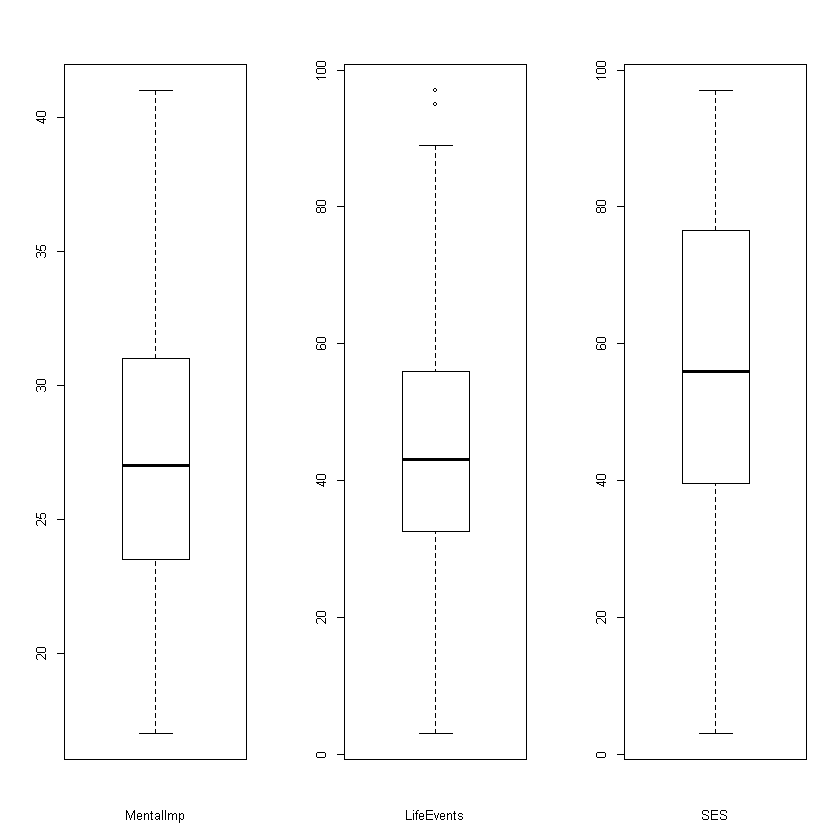

In [23]:
# histograms of each variable
par(mfrow=c(1,3))
boxplot(MH_data$MentalImp, xlab="MentalImp")
boxplot(MH_data$LifeEvents, xlab="LifeEvents")
boxplot(MH_data$SES, xlab="SES")
par(mfrow=c(1,1))

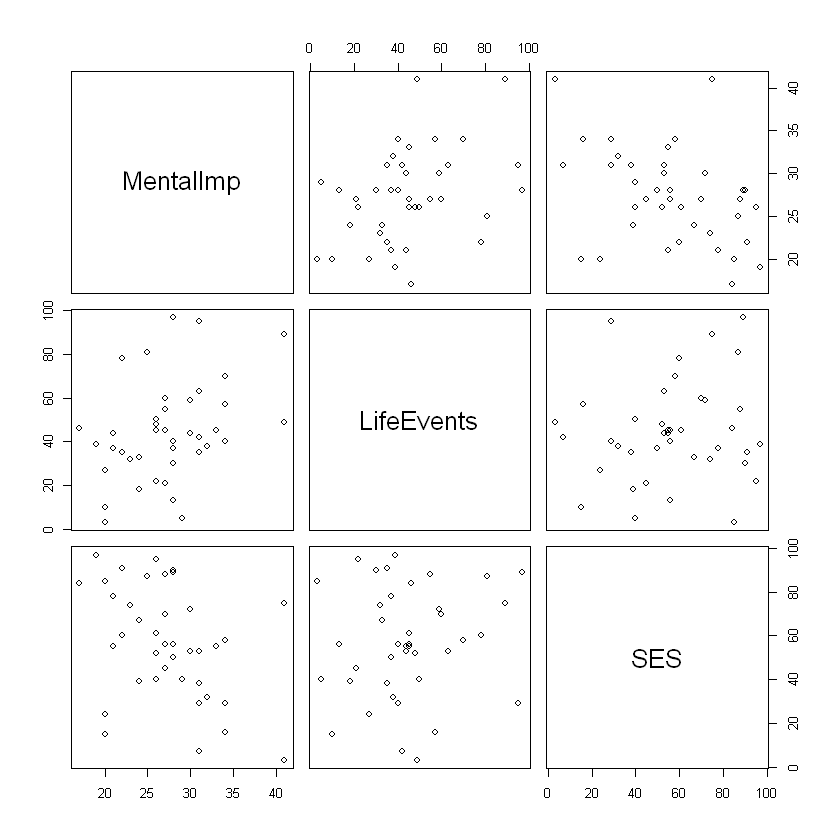

In [24]:
pairs(MH_data)

#### (b) Simple Linear Regression
Fit a model to estimate the mean Mental Impairment using SES.  Interpret the model slope, and report a 95% confidence interval for it.  What proportion of variation in mental health impairment can be explained by SES? 
• NOTE: The interpretation of the slope is hampered by the arbitrary nature of both scales (the MentalImp and SES scales) (ie) What does an increase of 1 mean? 

In [25]:
mod1 <- lm(MentalImp~SES, data=MH_data)
summary(mod1)


Call:
lm(formula = MentalImp ~ SES, data = MH_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.8808  -2.7472   0.2939   2.7382  15.2838 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 32.17201    1.98765  16.186   <2e-16 ***
SES         -0.08608    0.03213  -2.679   0.0109 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.072 on 38 degrees of freedom
Multiple R-squared:  0.1589,	Adjusted R-squared:  0.1367 
F-statistic: 7.177 on 1 and 38 DF,  p-value: 0.01085


In [26]:
confint(mod1)

,2.5 %,97.5 %
(Intercept),28.1482262,36.19579661
SES,-0.1511251,-0.02103079


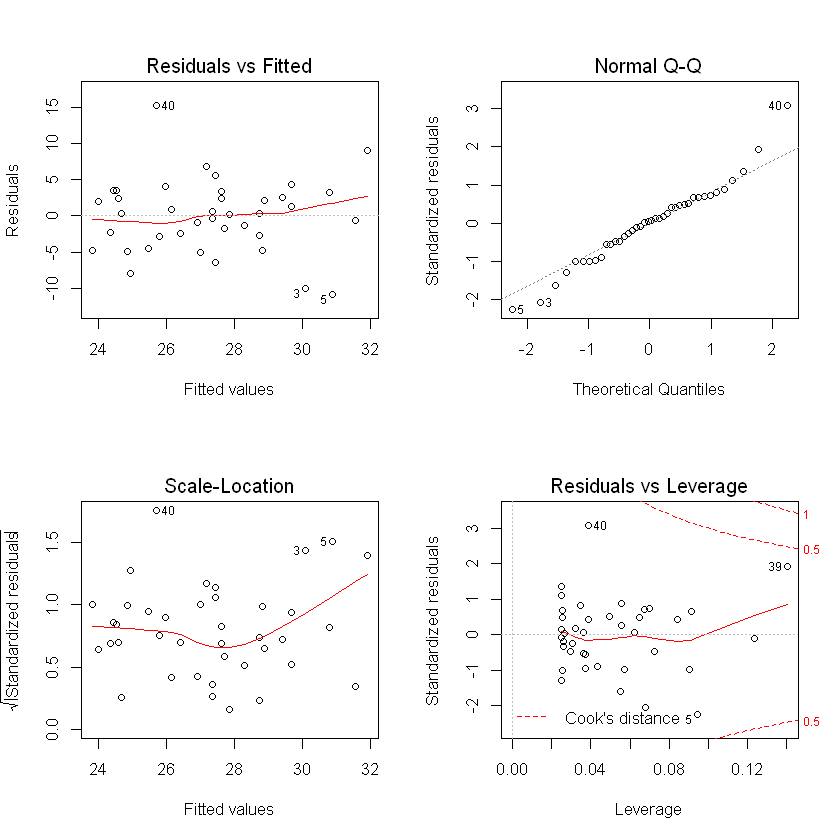

In [27]:
# diagnostic plots
par(mfrow=c(2,2))
plot(mod1)
par(mfrow=c(1,1))

#### (c) Multiple Linear Regression
Fit a model that includes both SES and LifeEvents as predictors of MentalImp.  How does this model compare to the model fit in part (b)?  Is this model significantly better? Do you think we should include both variables in the 
model? Why or why not? 

In [28]:
mod2 <- update(mod1, ~. + LifeEvents)
summary(mod2)


Call:
lm(formula = MentalImp ~ SES + LifeEvents, data = MH_data)

Residuals:
   Min     1Q Median     3Q    Max 
-8.678 -2.494 -0.336  2.886 10.891 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 28.22981    2.17422  12.984 2.38e-15 ***
SES         -0.09748    0.02908  -3.351  0.00186 ** 
LifeEvents   0.10326    0.03250   3.177  0.00300 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.556 on 37 degrees of freedom
Multiple R-squared:  0.3392,	Adjusted R-squared:  0.3034 
F-statistic: 9.495 on 2 and 37 DF,  p-value: 0.0004697


In [29]:
confint(mod2)

,2.5 %,97.5 %
(Intercept),23.82442063,32.63520577
SES,-0.15640693,-0.03854412
LifeEvents,0.03740929,0.16910964


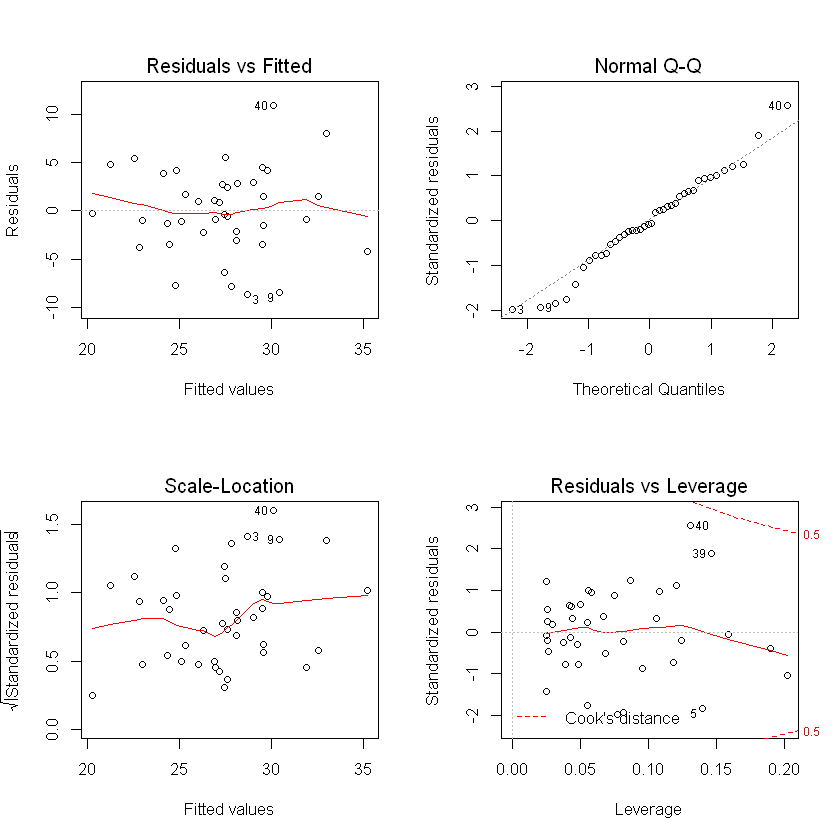

In [30]:
par(mfrow=c(2,2))
plot(mod2)
par(mfrow=c(1,1))

In [31]:
anova(mod1, mod2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
38,977.7456,NA,NA,NA,NA
37,768.1616,1,209.584,10.09502,0.002997728


#### (d) Linearity
Check the linearity assumption (include both variables in the model, but check linearity for just SES) in two ways.  First, check the assumption using residual plots.  Second, check the assumption of linearity with SES by including SES-squared in the model, and testing if this model is significantly better.  What do you conclude?  

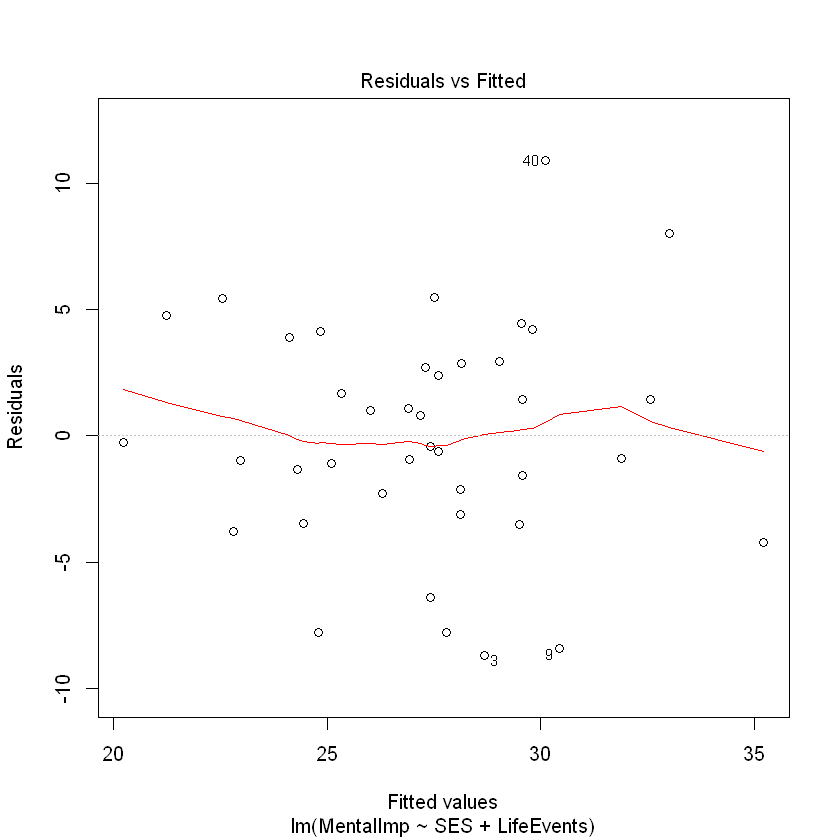

In [32]:
# check linearity by residuals plot
plot(mod2, which=1)

In [33]:
# create SES_quared variable
MH_data$SES_sq <- (MH_data$SES)^2

In [34]:
#linear model with linear and squared SES
mod3 <- update(mod2, ~. + SES_sq)
summary(mod3)


Call:
lm(formula = MentalImp ~ SES + LifeEvents + SES_sq, data = MH_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.7006 -2.4727 -0.3213  2.9224 10.9046 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 28.4539735  3.2128093   8.856 1.44e-10 ***
SES         -0.1084352  0.1180366  -0.919  0.36439    
LifeEvents   0.1033293  0.0329516   3.136  0.00341 ** 
SES_sq       0.0001027  0.0010712   0.096  0.92414    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.619 on 36 degrees of freedom
Multiple R-squared:  0.3393,	Adjusted R-squared:  0.2843 
F-statistic: 6.163 on 3 and 36 DF,  p-value: 0.001717


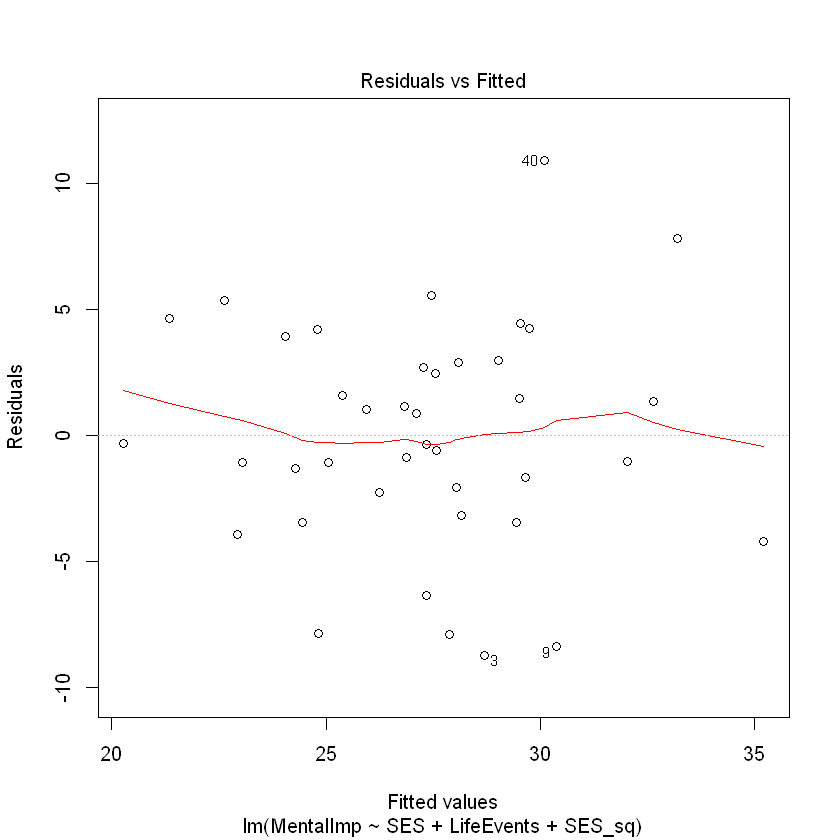

In [35]:
# residual vs fitted for mod3
plot(mod3, which=1)

#### (e) Prediction
For an individual with a LifeEvent score of 60 and a SES of 40, what would you predict their Mental Impairment score to be?  By hand, approximate an interval that you are 95% confident the individual’s Mental Impairment score will be in (you may also use software to get an exact interval, if you prefer). 

In [31]:
new=data.frame(LifeEvents=60, SES=40)
predict(mod2, newdata=new, interval="prediction", level=.95)

fit,lwr,upr
31.00598,21.49314,40.51881


#### (f) Standardized Variables
It was noted in part (b), that interpretations of model coefficients are being hampered by the ambiguity of scales for all variables (ie) what does an increase of 1 unit in the Life Event Score even mean?  What does an increase of 10 mean?  Standardize all of the variables (explanatory and outcome), and then fit a model like you did in part (c), except this time using the standardized variables.  How does this model compare to the model fit in part (c)?  What are the interpretations of the coefficients for SES and Life Event Score now?  Do you believe this model provides more/less useful interpretations?  What do you gain by standardizing?  What do you lose by standardizing?

In [32]:
#standardize variables
MH_std <- scale(MH_data[,c("SES", "LifeEvents", "MentalImp")])
MH_std <- as.data.frame(MH_std)
summary(MH_std)

      SES             LifeEvents         MentalImp       
 Min.   :-2.15467   Min.   :-1.87872   Min.   :-1.85640  
 1st Qu.:-0.68669   1st Qu.:-0.49759   1st Qu.:-0.67399  
 Median :-0.05188   Median :-0.05282   Median :-0.03731  
 Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.76146   3rd Qu.: 0.43877   3rd Qu.: 0.59937  
 Max.   : 1.57480   Max.   : 2.52217   Max.   : 2.50940  

In [33]:
apply(MH_std, 2, sd)

SES LifeEvents  MentalImp 
         1          1          1

In [34]:
# fit new model with standardized vars
mod4 <- lm(MentalImp~., data=MH_std)
summary(mod4)


Call:
lm(formula = MentalImp ~ ., data = MH_std)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.64184 -0.41419  0.07667  0.49742  1.86525 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  2.181e-16  1.326e-01   0.000  1.00000   
SES         -4.810e-01  1.372e-01  -3.505  0.00124 **
LifeEvents   4.572e-01  1.372e-01   3.331  0.00201 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.828 on 36 degrees of freedom
Multiple R-squared:  0.3504,	Adjusted R-squared:  0.3144 
F-statistic: 9.711 on 2 and 36 DF,  p-value: 0.0004238


In [35]:
# for comparison
summary(mod2)


Call:
lm(formula = MentalImp ~ ., data = MH_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.0256 -2.2769  0.4215  2.7344 10.2538 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 28.14291    2.17370  12.947 4.12e-15 ***
LifeEvents   0.11766    0.03532   3.331  0.00201 ** 
SES         -0.10491    0.02993  -3.505  0.00124 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.552 on 36 degrees of freedom
Multiple R-squared:  0.3504,	Adjusted R-squared:  0.3144 
F-statistic: 9.711 on 2 and 36 DF,  p-value: 0.0004238
